In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math

##### playing with derivaives

In [19]:
def f(x):
    return x**4 - 10*x + 5 

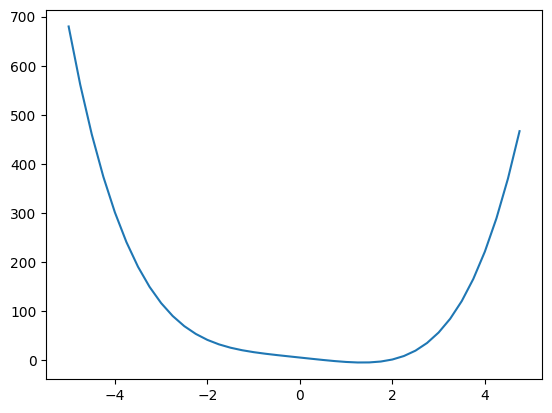

In [20]:
xn = np.arange(-5,5,0.25)
yn = f(xn)
plt.plot(xn,yn)

In [21]:
# derivative is f(x+h)-f(x)/h where h points to zero
# f(x+h) - f(x) tells us about the change and then normalizing it by h gives the slope
h = 0.0000001
x = 2

(f(x+h)-f(x))/h


22.00000238872235

In [22]:
# more complex
a = 8
b = 5
c = 10
d = a*b + c # 50
d1 = a*b + c # 50
h = 0.000001
a += h 
d2 = a*b + c

slope = (d2 - d1) / h
print('d1',d1)
print('d2',d2)
print('slope',slope)



d1 50
d2 50.000004999999994
slope 4.999999994481641


In [45]:
#structuring
class Value:
    def __init__(self,data,_children=(),_op='',label=''):
         self.data = data
         self.grad = 0.0
         self._prev = set(_children)
         self._op = _op
         self.label = label

    def __repr__(self):
         return f"Value(data={self.data})"
    
    def __add__(self,other):
         out = Value(self.data+other.data,(self,other),'+')
         return out
    
    def __mul__(self,other):
         out = Value(self.data*other.data,(self,other),'*')
         return out
    
    def tanh(self):
         x = self.data
         eq = (math.exp(2*x) - 1 )/ (math.exp(2*x) + 1)
         out = Value(eq,(self,),'tanh')
         return out
    

In [24]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [29]:
#from andrej's notebook
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


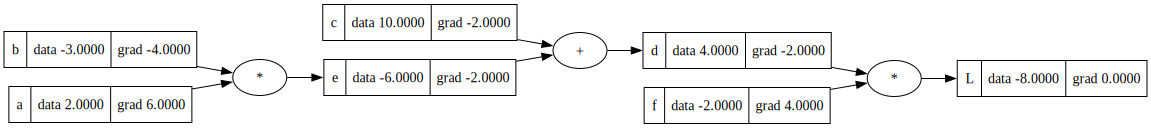

In [38]:
draw_dot(L)

example:

dL/dL = 1

dL/df = 4.0

calculation : (f(x+h)-f(x))/h = ((d+h)*f) - (d*f)/h= (d*f + d*h) - (d*f)/h = d

local grad : dd/dc = 1

d = e + c 

f(x+h)-f(x)/h = e + c + h - (e+c )/h = 1

and we know dL/dd  = -2.0 

so global grad: dL/dc =(dL/dd)*(dd/dc) = -2.0

for dL/da: we know dL/de = -2, and we will calculate the local grad which is de/da = b( e = a*b)   - proved above 

do dL/da = (dL/de)*(de/da) = 6.0

In [39]:
# we will nudge the elements in the direction of the gradient and we will expect that the L will increase
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

-7.286496


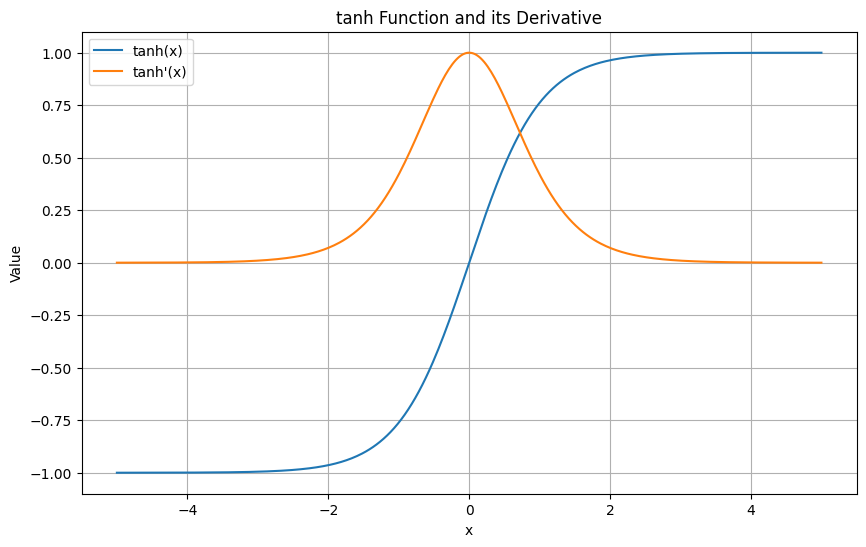

In [40]:
# visualing the tanh activation function 
x = np.linspace(-5, 5, 400)
tanh = np.tanh(x)
tanh_derivative = 1 - np.tanh(x)**2

plt.figure(figsize=(10, 6))
plt.plot(x, tanh, label='tanh(x)')
plt.plot(x, tanh_derivative, label="tanh'(x)")
plt.title('tanh Function and its Derivative')
plt.xlabel('x')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

#### neuron

<img src="https://cs231n.github.io/assets/nn1/neuron_model.jpeg" />



In [46]:
# manual backpropogation example using neorun 
# in this  case the neorun has two inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n'
#applying the activation function tanh
o = n.tanh(); o.label = 'o'

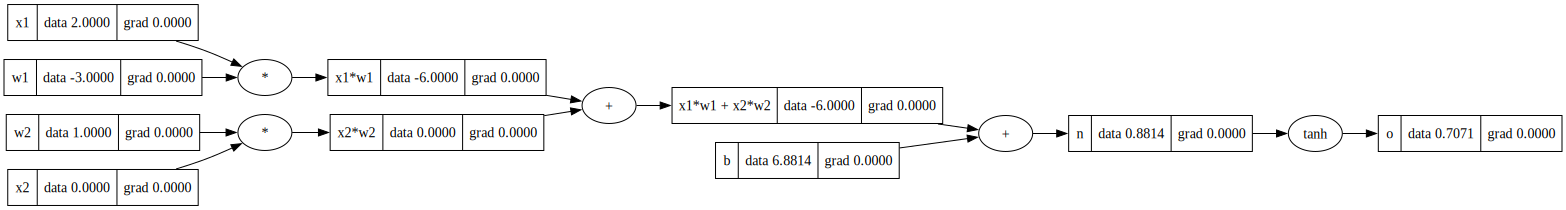

In [47]:
draw_dot(o)